In [1]:
# import the necessary packages
import matplotlib.pyplot as plt
from matplotlib import colors
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib import cm
from matplotlib.colors import hsv_to_rgb
import numpy as np
import cv2

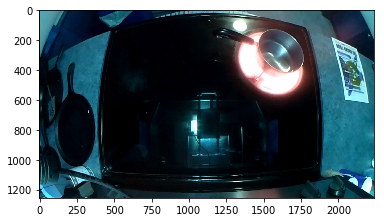

In [2]:
# image of a non-boiling pot
potWater = cv2.imread('../../Desktop/Stove.jpg')
plt.imshow(potWater)
plt.show()

In [3]:
def undistort(img, balance=0.0, dim2=None, dim3=None):
    K = np.array(
        [[318.5047565963465, 0.0, 304.72174448074446], [0.0, 318.3070269260298, 234.84280567757642], [0.0, 0.0, 1.0]])
    D = np.array([[-0.041193383831182505], [0.012582938251747337], [-0.026474498577198458], [0.020393209710516367]])
    DIM = (480, 640)  # image dimensions

    dim1 = img.shape[:2][::-1]  # dim1 is the dimension of input image to undistort

    if not dim2:
        dim2 = dim1

    if not dim3:
        dim3 = dim1

    scaled_K = K * dim1[0] / DIM[0]  # The values of K is to scale with image dimension
    scaled_K[2][2] = 1.0

    new_K = cv2.fisheye.estimateNewCameraMatrixForUndistortRectify(scaled_K, D, dim2, np.eye(3), balance=balance)
    map1, map2 = cv2.fisheye.initUndistortRectifyMap(scaled_K, D, np.eye(3), new_K, dim3, cv2.CV_16SC2)
    undistorted_img = cv2.remap(img, map1, map2, interpolation=cv2.INTER_LINEAR, borderMode=cv2.BORDER_CONSTANT)

    return undistorted_img

## Circle Detection: Pot of Water

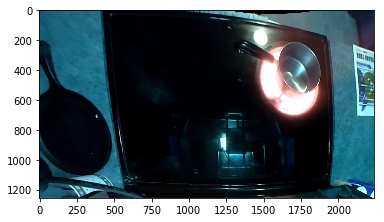

In [4]:
#undistort the image
calPotWater = undistort(potWater)
plt.imshow(calPotWater)
plt.show()

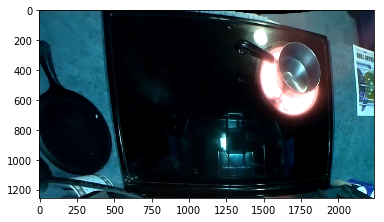

In [5]:
bilateral_filtered_image = cv2.bilateralFilter(calPotWater, 5, 175, 175)
plt.imshow(bilateral_filtered_image)
plt.show()

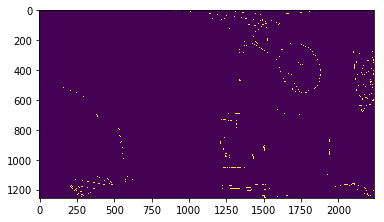

In [6]:
edge_detected_image = cv2.Canny(bilateral_filtered_image, 75, 200)
plt.imshow(edge_detected_image)
plt.show()

In [7]:
# creates list of contours
contours,_= cv2.findContours(edge_detected_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contour_list = []

# finds the circular shapes
for contour in contours:
    approx = cv2.approxPolyDP(contour,0.01*cv2.arcLength(contour,True),True)
    area = cv2.contourArea(contour)
    if ((len(approx) > 8) & (area > 30) ):
        contour_list.append(contour)

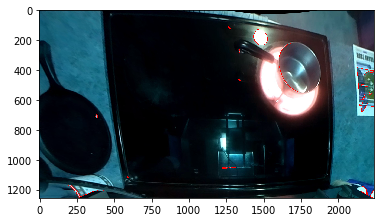

In [8]:
# draws the circles detected in the image
cv2.drawContours(calPotWater, contour_list,  -1, (255,0,0), 2)
plt.imshow(calPotWater)
plt.show()

## Circle Detection: Boiling Pot with High Burner

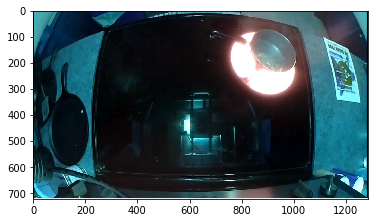

In [9]:
# image of a boiling pot
potBoil = cv2.imread('../../Desktop/Stove_boil.jpg')
plt.imshow(potBoil)
plt.show()

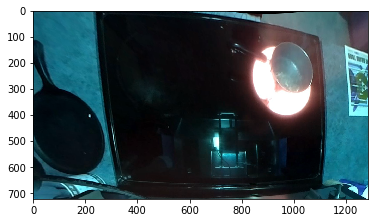

In [10]:
#undistort the image
calPotBoil = undistort(potBoil)
plt.imshow(calPotBoil)
plt.show()

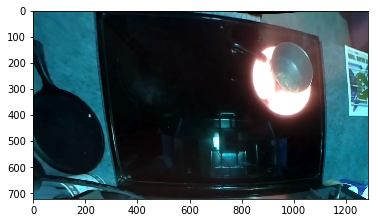

In [11]:
bilateral_filtered_image = cv2.bilateralFilter(calPotBoil, 5, 175, 175)
plt.imshow(bilateral_filtered_image)
plt.show()

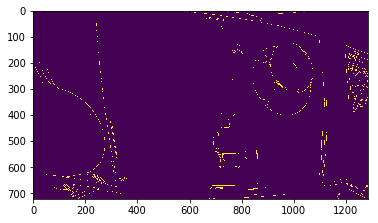

In [12]:
edge_detected_image = cv2.Canny(bilateral_filtered_image, 75, 200)
plt.imshow(edge_detected_image)
plt.show()

In [13]:
# creates list of contours
contours,_= cv2.findContours(edge_detected_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contour_list = []

# finds the circular shapes
for contour in contours:
    approx = cv2.approxPolyDP(contour,0.01*cv2.arcLength(contour,True),True)
    area = cv2.contourArea(contour)
    if ((len(approx) > 8) & (area > 30) ):
        contour_list.append(contour)

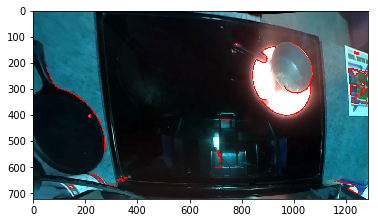

In [14]:
# draws the circles detected in the image
cv2.drawContours(calPotBoil, contour_list,  -1, (255,0,0), 2)
plt.imshow(calPotBoil)
plt.show()

## Circle Detection: Boiling Pot with Low Burner Light

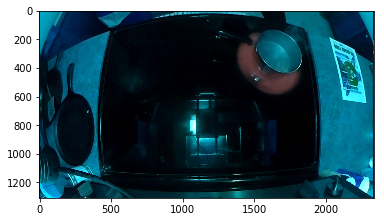

In [21]:
# image of a boiling pot
potBoilLow = cv2.imread('../../Desktop/Stove_boil_no_light.jpg')
plt.imshow(potBoilLow)
plt.show()

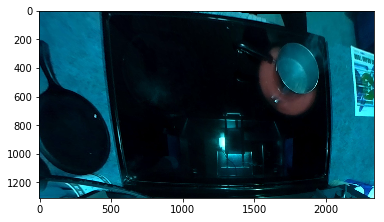

In [16]:
#undistort the image
calPotBoilLow = undistort(potBoilLow)
plt.imshow(calPotBoilLow)
plt.show()

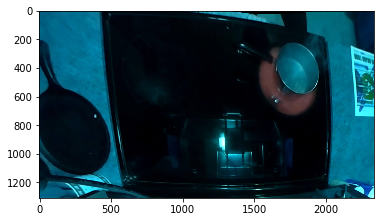

In [17]:
bilateral_filtered_image = cv2.bilateralFilter(calPotBoilLow, 5, 175, 175)
plt.imshow(bilateral_filtered_image)
plt.show()

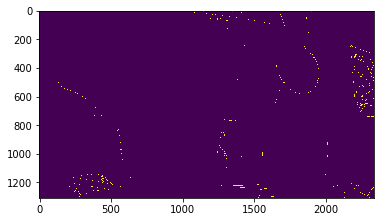

In [18]:
edge_detected_image = cv2.Canny(bilateral_filtered_image, 75, 200)
plt.imshow(edge_detected_image)
plt.show()

In [19]:
# creates list of contours
contours,_= cv2.findContours(edge_detected_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contour_list = []

# finds the circular shapes
for contour in contours:
    approx = cv2.approxPolyDP(contour,0.01*cv2.arcLength(contour,True),True)
    area = cv2.contourArea(contour)
    if ((len(approx) > 8) & (area > 30) ):
        contour_list.append(contour)

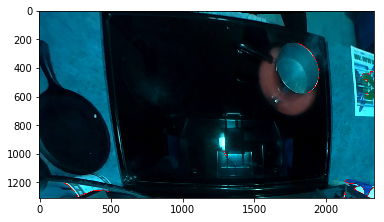

In [20]:
# draws the circles detected in the image
cv2.drawContours(calPotBoilLow, contour_list,  -1, (255,0,0), 2)
plt.imshow(calPotBoilLow)
plt.show()

## Circle Detection: Pot Boiling Close Up

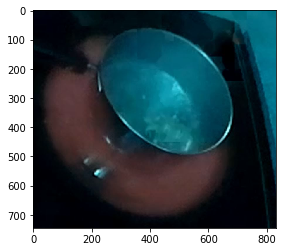

In [27]:
# image of a boiling pot
burnerBoil = cv2.imread('../../Desktop/BurnerBoil.jpg')
plt.imshow(burnerBoil)
plt.show()

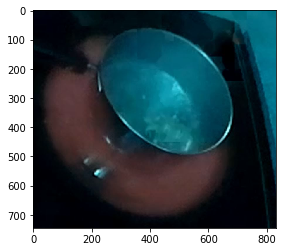

In [28]:
#undistort the image
calBurnerBoil = undistort(burnerBoil)
plt.imshow(burnerBoil)
plt.show()

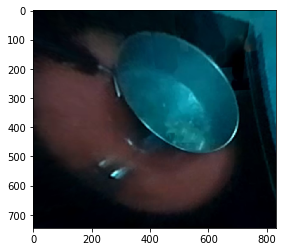

In [29]:
bilateral_filtered_image = cv2.bilateralFilter(calBurnerBoil, 5, 175, 175)
plt.imshow(bilateral_filtered_image)
plt.show()

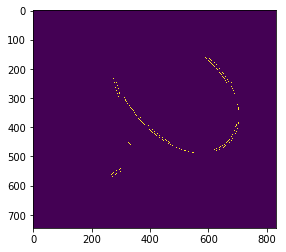

In [30]:
edge_detected_image = cv2.Canny(bilateral_filtered_image, 75, 200)
plt.imshow(edge_detected_image)
plt.show()

In [32]:
# creates list of contours
contours,_= cv2.findContours(edge_detected_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contour_list = []

# finds the circular shapes
for contour in contours:
    approx = cv2.approxPolyDP(contour,0.01*cv2.arcLength(contour,True),True)
    area = cv2.contourArea(contour)
    if ((len(approx) > 8) & (area > 30) ):
        contour_list.append(contour)

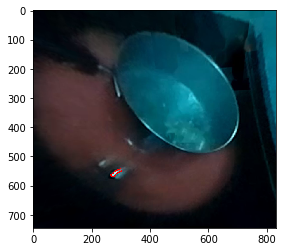

In [33]:
# draws the circles detected in the image
cv2.drawContours(calBurnerBoil, contour_list,  -1, (255,0,0), 2)
plt.imshow(calBurnerBoil)
plt.show()

### Conclusions:
This seems to be more promising for detecting a pot placed on a stove rather than boiling itself
These results apply Bilateral Image Filtering, Canny edge detection, finds counters, and approxPolyDP (finds the kind of polygon the counter is)